# netCDF

## We are going to make an animated gif and not embarass a friend!


First we will need to install a new package called netCFD4. 

*  As always I googled "conda install netcd4"
*  It takes me to this site. https://anaconda.org/anaconda/netcdf4
*  Copy and paste "conda install -c anaconda netcdf4" into terminal or the prompt
*  BUT THIS FAILED FOR ME!
*  I uninstalled via "conda remove netcdf4"
*  then I pip installed "pip install netcdf4" and it worked
*  restart the kernal



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import netCDF4

from mpl_toolkits.basemap import Basemap

import datetime

I am not saying much today.  You are going to read in a netcdf file.  Plot sea surface temperatures.  Animate them for the year and turn in an animated GIF.  

What is a netcdf file??? Go check it out on wikipedia http://en.wikipedia.org/wiki/NetCDF

It stands for Network Common Data File

It is a data file where the header describes the file and you can get all the data out into arrays.  BUT it is in binary form to save space.  So you can't see what it is but have to read the information to learn about it.  So that is sort of weird.  It is a little like a black box (or now those Escape Room Parties). It is used a lot in oceanography and atmospheric sciences.  So lets learn by doing.  I always feel like I am in a fog with netcdf because I don't use them much and I can't just look at the file.  But at least lets get exposed so you could do it on your own next time.  Basically since we are looking at sea surface temperatures we will want a map as our final output

The links to get the sea surface data don't always work.  Be patient.  

* Start here http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html#detail
* I have to scroll up. 
* click on daily mean and the words 'select list' which are tiny and to the right.
* then click 'see list' for the Daily Mean
* then click 2014 and it will download.
* It is a 400mb file.  It might be slow if you are on wifi
* Now make sure it is saved in your working directory and we can open it.  url is he file name.  

In [2]:
url=('sst.day.mean.2014.v2.nc')
f=netCDF4.Dataset(url)

You saved the file into "f".  So if we print f we will see part of it.  But remember the f is not the whole file but more like a function that we can then call to get at the whole file.  We will use "f." notation to learn about the file.

In [4]:
print (f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA High-resolution Blended Analysis: Daily Values using AVHRR only
    institution: NOAA/NCDC
    source: NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    history: Version 1.0
    comment: Reynolds, et al., 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496.  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy NOAA17 NOAA18 AVHRR, Ice data: NCEP ice. Data less than 15 days old may be subject to revision.
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    References: http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html
    dimensions(sizes): time(365), lat(720), lon(1440)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(

So what do we have?  We have 365 time steps of lat and long with sea surface temperatures at every day.  so lets try to pull it out.  It is easy....

In [5]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [78162. 78526.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used



Now lets look at latitude.  

In [6]:
print (f.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    actual_range: [-89.875  89.875]
    axis: Y
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used



There are 720 locations for latitude.  Or 4 values every degree

Now lets look at longitude

In [7]:
print (f.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
    actual_range: [1.25000e-01 3.59875e+02]
    axis: X
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used



longitude has 1440 values or twice as many as latitude as it goes around the whole globe

Now we can look at the actual sea surface temperature.

In [8]:
print (f.variables['sst'])

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Daily Sea Surface Temperature
    units: degC
    valid_range: [-3. 45.]
    missing_value: -9.96921e+36
    precision: 2.0
    dataset: NOAA High-resolution Blended Analysis
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Observations
    actual_range: [-1.8 34.8]
unlimited dimensions: time
current shape = (365, 720, 1440)
filling on, default _FillValue of 9.969209968386869e+36 used



The sst is really cool.  Think of it as 365 days of data, each in an array of values in the shape of 720 by 1440.  So for each day we will have a map of sea surface temperatures.

Can we actually look at some numbers?   Remove the comment as I put it in to save space when printing.  

In [10]:
 f.variables['lat'][:]

So we can pull out numbers and look at them.  They all come out in numpy arrays.  

In [11]:
type(f.variables['lat'][:])

numpy.ma.core.MaskedArray

But we can pull them out and set them to a variable. We are not going to use Pandas and just leave everything in numpy arrays for today.  

In [3]:
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['sst'][:]
time=f.variables['time'][:]

You can look at the shape of each element.  Remember 1 year has 365 days!

In [13]:
np.shape(time)

(365,)

In [14]:
np.shape(lon)

(1440,)

In [15]:
np.shape(lat)

(720,)

In [16]:
np.shape(sst)

(365, 720, 1440)

So what do we have?  We have a lat/lon grid.  Then each point has a sst.  Then we have that repeated 365 times for each day of the year.  

Do you remember the easy way we plotted the Brian! Array? Well lets use that to look at one slice of the sst.   

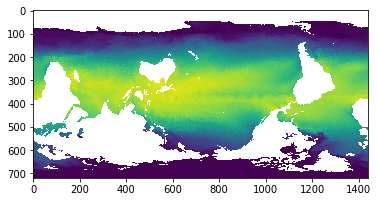

In [4]:
fig,ax=plt.subplots()
ax.imshow(sst[0])

What just happened?  This did not make a map?  It just took the sst array and plotted it.  Each array point has a latittude and longitude we could use to make a map.  But we didn't do that.  We just did a raw imshow which shows the array.  It is a nice start.   Read the help and see if you can flip the array? 

In [18]:
?plt.imshow

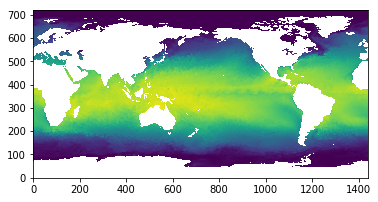

In [19]:
fig,ax=plt.subplots()
ax.imshow(sst[0],origin='lower')

imshow is nice as a quick way to show an array but it is not a map.  The next way to make a better map is pcolormesh.  It uses the lat and long so it is better but still not a map.  

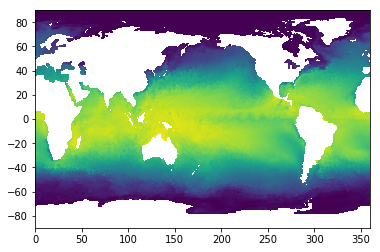

In [20]:
fig,ax=plt.subplots()
ax.pcolormesh(lon,lat,sst[0])

Lets try to make that nicer

* I am going to set the vmin and vmax
* change the colormap to one that is better for temperature called jet.

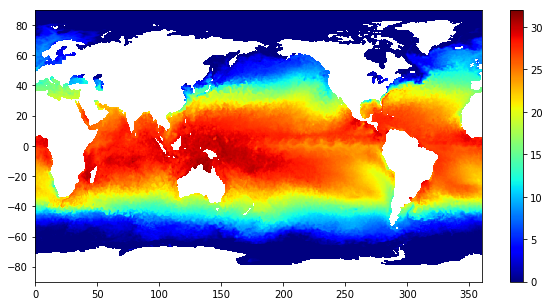

In [21]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
colormap = plt.cm.jet
im=ax.pcolormesh(lon,lat,sst[0],vmax=32,vmin=0,cmap=colormap)
ax.set_xlim([0,360])
ax.set_ylim([-90,90])
cbar=fig.colorbar(im)

Now that is still not a proper map but it is a quick way to plot a lot of data.  

But we did basemap last week.  We can use what we did last week and make a better map.  
* We can use basemap and choose a projection.  I chose kav7
* we can draw something for the continents.  I tried blue marble and it didn't look great so i added coastlines and countries.
* I added meridians and parallels.
* I put the colorbar on the bottom as I like it there and I added a title to it
* I also saved the fig and made the size small as we will need that later also.  dpi sets the resolution

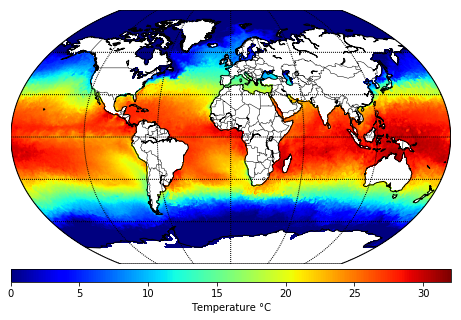

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
m = Basemap(projection='kav7',lon_0=0,ax=ax)
lon_pc, lat_pc = np.meshgrid(lon,lat)
colormap = plt.cm.jet
m.drawcoastlines()
m.drawcountries()
im=m.pcolormesh(lon_pc,lat_pc,sst[0],vmax=32,vmin=0,cmap=colormap,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
cbar=m.colorbar(im,'bottom')
cbar.set_label(u'Temperature \N{DEGREE SIGN}C')
fig.savefig('FirstTrySST.png',dpi=50)

That is a good looking map!!!!

Now go back above and change the sst[0] calls to another number as this represents the day of the year.  Can you see a change???


I am starting to see a path forward for how to make a movie of the temperatures over the year.  Python is not perfect for making movies.  We are going to make a modern flip book.  We will save an image for each frame and then we can use python or a web program to put them together.  It is like turning a burst on your phone into a movie.  We want to end with an aniamted GIF with python or a program.  Things we will need to be able to do.
* Loop over all the data.
* Figure out the date for the data.
* plot the data.
* save the data in a unique file for each day
* use python/website to put it all togehter.  

So we need to lean each of these steps.  I will start with figuring out the date for each slice.  

In [25]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [78162. 78526.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used



What does this mean?????  Time since 1800.  Holy crazy.  Lets look.  I commented it out to save space

In [27]:
#print (time)

In [18]:
78526/365.0

215.13972602739727

That makes sense.  It has been 215 years since 1801.  But how do we use it???

Luckily Python has a datetime module!!!  We have been using it in Pandas w/o you realizing it.  https://docs.python.org/2/library/datetime.html

Plus I had you import it above!   so type datetime. and hit tab and see what we got!

In [ ]:
datetime.

In [44]:
datetime.datetime(

datetime.datetime

So lets add the year,month,day and see what happens

In [29]:
datetime.datetime(2015,4,10)

datetime.datetime(2015, 4, 10, 0, 0)

In [30]:
today=datetime.datetime(2018,11,20)
print (today)
type(today)

2018-11-20 00:00:00


datetime.datetime

So we can make ourselves a datetime!  plus datetime has a function called timedelta....

In [52]:
?datetime.timedelta

Now go back to https://docs.python.org/2/library/datetime.html and scroll down to the table.  

It says we can do

Date2=startdate+timedelta

date1=1800-01-01

timedelta=78526 days

Lets try it!

In [34]:
startdate=datetime.datetime(1800,1,1)
print (startdate)

1800-01-01 00:00:00


remember delta signifies change

In [36]:
datedelta=datetime.timedelta(days=78526)
print (datedelta)

78526 days, 0:00:00


In [93]:
type(datedelta)

datetime.timedelta

In [37]:
print (startdate+datedelta)

2014-12-31 00:00:00


We could print the date nicely using format notation

In [38]:
print ("The last date is {:%b %d, %Y}".format(startdate+datedelta))

The last date is Dec 31, 2014


Here is a summary https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

Awesome!!! The last sample is the last day of 2014!!! It worked!!! Now we could make a loop that goes over the time arrray and prints the date of each day.  I just printed each 30th date using mod.  

In [41]:
startdate=datetime.datetime(1800,1,1)
for t in time:
    date=datetime.timedelta(days=t)+startdate
    if t%30==0: #I did this to save space
        print ("The date is {:%b %d, %Y}".format(date))

The date is Jan 19, 2014
The date is Feb 18, 2014
The date is Mar 20, 2014
The date is Apr 19, 2014
The date is May 19, 2014
The date is Jun 18, 2014
The date is Jul 18, 2014
The date is Aug 17, 2014
The date is Sep 16, 2014
The date is Oct 16, 2014
The date is Nov 15, 2014
The date is Dec 15, 2014


Next we need a file name.  We will want our files nicely oraganized.  We could use the dates to name the files but I think using a number to name them may be better.  We can use enumerate to get a number and a value or we could use np.arange().  

In [42]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    if t%30==0:
        print ("The date is {:%b %d, %Y}".format(date))
        print (day)

The date is Jan 19, 2014
18
The date is Feb 18, 2014
48
The date is Mar 20, 2014
78
The date is Apr 19, 2014
108
The date is May 19, 2014
138
The date is Jun 18, 2014
168
The date is Jul 18, 2014
198
The date is Aug 17, 2014
228
The date is Sep 16, 2014
258
The date is Oct 16, 2014
288
The date is Nov 15, 2014
318
The date is Dec 15, 2014
348


It works but now you need to turn the number into a string with .png on it.  Also, computers are funny for how they list things.  So we need to pad the numbers and make them 001, 002, 003, etc.  So we can use format and we can pad the integers.  Do you remember this from one of the first classes?  If not here is a stackoverflow link https://stackoverflow.com/questions/339007/nicest-way-to-pad-zeroes-to-string

In [43]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    filename="sst_{:03d}.png".format(day)
    if t%30==0:
        print ("The date is {:%b %d, %Y}".format(date))
        print (filename)

The date is Jan 19, 2014
sst_018.png
The date is Feb 18, 2014
sst_048.png
The date is Mar 20, 2014
sst_078.png
The date is Apr 19, 2014
sst_108.png
The date is May 19, 2014
sst_138.png
The date is Jun 18, 2014
sst_168.png
The date is Jul 18, 2014
sst_198.png
The date is Aug 17, 2014
sst_228.png
The date is Sep 16, 2014
sst_258.png
The date is Oct 16, 2014
sst_288.png
The date is Nov 15, 2014
sst_318.png
The date is Dec 15, 2014
sst_348.png


But I will want to put the files into a subfolder.  So if you make a folder named sst/ we could add the prefix to the name.

In [44]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    filename="sst/sst_{:03d}.png".format(day)
    if t%30==0:
        print ("The date is {:%b %d, %Y}".format(date))
        print (filename)

The date is Jan 19, 2014
sst/sst_018.png
The date is Feb 18, 2014
sst/sst_048.png
The date is Mar 20, 2014
sst/sst_078.png
The date is Apr 19, 2014
sst/sst_108.png
The date is May 19, 2014
sst/sst_138.png
The date is Jun 18, 2014
sst/sst_168.png
The date is Jul 18, 2014
sst/sst_198.png
The date is Aug 17, 2014
sst/sst_228.png
The date is Sep 16, 2014
sst/sst_258.png
The date is Oct 16, 2014
sst/sst_288.png
The date is Nov 15, 2014
sst/sst_318.png
The date is Dec 15, 2014
sst/sst_348.png


Now we know how to
* Make a title name with the date.
* make a file name
* loop over the array

But before you begin you need to think a little.  

Each timestep we are going to make a figure, make a map, and save it.  

But making a figure and map are "expensive" and eat up cpu.  Any you need to this 365 times.  So when you loop you want to set as many things before your loop as possible.  Then you can use ax.cla() to clear the colormesh.  If you don't clear the axis you keep putting each day over the last day and you computer will grind to a halt.  So i would test things by running just a few days.  You can do this by only calling the first so many parts of the array.  Your for loop might look like

for day,t in enumerate(time[:30]):


The websites for making a gif are full or viruses.  I would use python.  

I found this stackoverflow example.  

https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python

Look at the answer and just update with your directories!

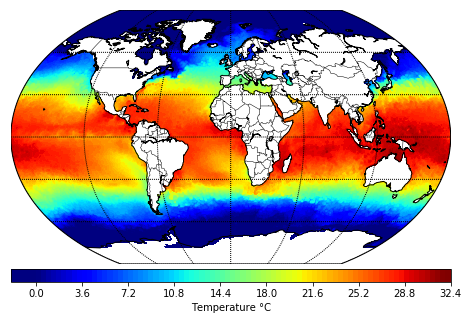

In [8]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
m = Basemap(projection='kav7',lon_0=0,ax=ax)
lon_pc, lat_pc = np.meshgrid(lon,lat)
colormap = plt.cm.jet
m.drawcoastlines()
m.drawcountries()
im=m.contourf(lon_pc,lat_pc,sst[0],100,vmax=32,vmin=0,cmap=colormap,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
cbar=m.colorbar(im,'bottom')
cbar.set_label(u'Temperature \N{DEGREE SIGN}C')
fig.savefig('FirstTrySST.png',dpi=50)